In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, cross_val_predict, LeaveOneOut
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import random
from datetime import datetime

import arff

In [2]:
solvent_data = pd.read_excel('/Users/jlisd/Downloads/AI Chem/AI Chem/Holistic prediction of enantioselectivity in asymmetric catalysis.Supplementary Data.xlsx', sheet_name = 'solvent')
solvent_data.set_index('solvent_name', inplace = True)
solvent_columns = list(solvent_data.columns)

In [3]:
nucleophile_data = pd.read_excel('/Users/jlisd/Downloads/AI Chem/AI Chem/Holistic prediction of enantioselectivity in asymmetric catalysis.Supplementary Data.xlsx', sheet_name = 'nucleophiles')
nucleophile_data.set_index('nucleophile_name', inplace = True)
nucleophile_columns = list(nucleophile_data.columns)

In [4]:
raw_catalyst_data = pd.read_excel('/Users/jlisd/Downloads/AI Chem/AI Chem/Holistic prediction of enantioselectivity in asymmetric catalysis.Supplementary Data.xlsx', sheet_name = 'model_catalyst')
raw_catalyst_data.rename(columns = {'Unnamed: 1': 'catalyst_name'}, inplace = True)

r_catalyst_data = raw_catalyst_data.copy()
for i in range(17):
    r_catalyst_data.iloc[i, 1] = r_catalyst_data.iloc[i, 1].replace('R/S', 'R')

s_catalyst_data = raw_catalyst_data.copy()
for i in range(17):
    s_catalyst_data.iloc[i, 1] = s_catalyst_data.iloc[i, 1].replace('R/S', 'S')

catalyst_data = pd.concat([r_catalyst_data, s_catalyst_data])
catalyst_data.set_index('catalyst_name', inplace = True)
catalyst_columns = list(catalyst_data.columns)

In [5]:
raw_catalyst_data = pd.read_excel('/Users/jlisd/Downloads/AI Chem/AI Chem/Holistic prediction of enantioselectivity in asymmetric catalysis.Supplementary Data.xlsx', sheet_name = 'full_catalyst')
raw_catalyst_data.rename(columns = {'last catalyst only S used': 'catalyst_name'}, inplace = True)

#Taking care of catalyst R/S
r_catalyst_data = raw_catalyst_data.copy()
for i in range(17):
    r_catalyst_data.iloc[i, 1] = r_catalyst_data.iloc[i, 1].replace('R/S', 'R')
    #print(r_catalyst_data.iloc[i, 1])
#r_catalyst_data.drop(17, inplace = True)    

s_catalyst_data = raw_catalyst_data.copy()
for i in range(17):
    s_catalyst_data.iloc[i, 1] = s_catalyst_data.iloc[i, 1].replace('R/S', 'S')
    #print(s_catalyst_data.iloc[i, 1])
    
catalyst_data = pd.concat([r_catalyst_data, s_catalyst_data])
catalyst_data.rename(columns = {'Unnamed: 1': 'catalyst_name'}, inplace = True)
catalyst_data.set_index('catalyst_name', inplace = True)

catalyst_columns = list(catalyst_data.columns)

catalyst_data

,Ar group,arhs,alhs,aavg,b,AREA(q),sin(AREA),Lwhole R,B1whole R,B5whole R,...,C3 A,C4 A,C5 A,C6 A,nPOsy,iPOsy,nPOas,iPOas,P,PNMR
catalyst_name,,,,,,,,,,,,,,,,,,,,,
"(R)-2,2'-Dihydroxy-3,3'-diphenyl-1,1'-binaphthalene cyclic phosphate",Ph,54.388,54.395,54.3915,56.388,70,0.773891,6.89,1.70,3.33,...,-0.23000,-0.22400,-0.21100,-0.186000,1085.06,364.3460,1306.55,271.6062,2.54600,266.5125
"(R)-3,3′-Bis(4-nitrophenyl)-1,1′-binaphthyl-2,2′-diyl hydrogenphosphate",4-NO2C6H4,52.789,52.801,52.7950,56.202,64,0.920026,8.28,1.70,3.34,...,-0.17700,0.01000,-0.19500,-0.207000,1086.44,320.2800,1310.44,295.3595,2.54500,266.1502
"(R)-3,3'-Bis[4-(2,4,6-trimethylphenyl)phenyl]-1,1'-binaphthyl-2,2'-diyl Hydrogen Phosphate","4-(2,4,6-MeC6H2)C6H4",53.962,53.963,53.9625,56.355,38,0.296369,12.27,2.97,4.61,...,-0.20700,-0.05300,-0.22300,-0.199000,1085.55,356.6200,1306.58,242.2277,2.54600,266.3224
"(R)-3,3′-Bis(4-chlorophenyl)-1,1′-binaphthyl-2,2′-diyl hydrogenphosphate",4-ClC6H4,53.704,53.718,53.7110,56.219,67,-0.855520,8.21,1.70,3.33,...,-0.23200,-0.03000,-0.25000,-0.190000,1085.19,338.5586,1306.11,286.4410,2.54600,266.1394
"(R)-3,3'-Bis(4-diphenyl)-1,1'-binaphthyl 2,2'-diyl hydrogenphosphate",4-PhC6H4,42.215,52.094,47.1545,55.769,50,-0.262375,11.22,2.01,3.50,...,-0.19550,-0.06650,-0.20200,-0.183500,1087.44,332.8368,1317.37,222.6765,2.53900,268.1404
"(R)-3,3′-Bis(4-trifluoromethylphenyl)-1,1′-binaphthyl-2,2′-diyl hydrogenphosphate",4-CF3C6H4,53.619,53.627,53.6230,56.229,56,-0.521551,8.28,1.83,3.34,...,-0.19300,-0.17200,-0.17700,-0.184000,1086.23,355.7629,1307.21,397.3333,2.54500,266.1523
"(R)-3,3′-Bis(3,5-dinitrolphenyl)-1,1′-binaphthyl-2,2′-diyl hydrogenphosphate","3,5-NO2C6H3",59.563,59.562,59.5625,55.628,66,-0.026551,7.58,1.70,5.12,...,0.02900,-0.17300,0.01300,-0.154000,1087.41,296.0611,1317.62,300.6142,2.54300,266.2896
"(R)-3,3'-Bis(3,5-diphenyl)phenyl-1,1'-binaphthyl-2,2'-diyl Hydrogen Phosphate","3,5-PhC6H3",42.585,60.259,51.4220,54.746,36,-0.991779,8.59,2.59,7.06,...,-0.04700,-0.18750,-0.05650,-0.171500,1085.98,366.5389,1310.24,248.6693,2.54800,269.8459
"(R)-3,3′-Bis[3,5-bis(trifluoromethyl)phenyl]-1,1′-binaphthyl-2,2′-diyl hydrogenphosphate","3,5-(CF3)2-C6H3",55.665,55.883,55.7740,56.229,62,-0.739181,7.44,2.39,5.06,...,-0.14850,-0.16150,-0.16650,-0.157000,1086.10,320.0554,1312.33,202.3039,2.54400,266.3457


In [6]:
iminium_data = pd.read_excel('/Users/jlisd/Downloads/AI Chem/AI Chem/Holistic prediction of enantioselectivity in asymmetric catalysis.Supplementary Data.xlsx', sheet_name = 'iminiums')
iminium_data.rename(columns = {'imine': 'iminium_name', 'electronic energy difference (kcal/mol) ': 'electronic energy difference (kcal/mol)'}, inplace = True)
#removed space at the end of electronic energy
iminium_data.set_index('iminium_name', inplace = True)
iminium_data.drop(labels = ['Unnamed: 1'], axis = 1, inplace = True)
for i in range(1, 181):
    z_iminium_name = '(Z)-Iminium ' + str(i)
    e_iminium_name = '(E)-Iminium ' + str(i)
    iminium_data.loc[z_iminium_name, 'electronic energy difference (kcal/mol)'] = iminium_data.loc[e_iminium_name, 'electronic energy difference (kcal/mol)']
iminium_columns = list(iminium_data.columns)

In [7]:
iminium_data.head()

,nNH,i NH,N,H (iminium),C,SubL,SubS,PG,PGL,PGB1,...,SL,SB1,SB5,LL,LB1,LB5,HOMO (iminium),LUMO (iminium),Polarizability (iminium),electronic energy difference (kcal/mol)
iminium_name,,,,,,,,,,,,,,,,,,,,,
(E)-Iminium 1,3474.83,97.5295,-0.426,0.442,0.487,-0.464,-0.697,0.030,8.85,1.76,...,3.59,1.7,2.12,4.61,1.7,7.04,-0.40205,-0.17518,201.89,1.62
(Z)-Iminium 1,3491.05,82.0336,-0.430,0.424,0.526,-0.488,-0.687,0.017,8.84,1.77,...,3.59,1.7,2.13,4.77,1.7,7.17,-0.40330,-0.17332,193.50,1.62
(E)-Iminium 2,3400.90,359.5285,-0.447,0.457,0.477,-0.466,-0.690,0.031,8.81,1.75,...,3.59,1.7,2.12,4.76,1.7,5.63,-0.40541,-0.17578,164.07,1.86
(Z)-Iminium 2,3494.88,82.0612,-0.438,0.425,0.523,-0.503,-0.689,0.022,8.85,1.76,...,3.59,1.7,2.13,4.66,1.7,5.07,-0.40963,-0.17836,160.51,1.86
(E)-Iminium 3,3196.55,910.2524,-0.419,0.469,0.420,-0.140,-0.690,0.032,8.79,1.74,...,3.59,1.7,2.12,7.09,1.7,7.45,-0.40169,-0.18157,220.26,0.69


In [8]:
class Reaction():
    
    def __init__(self, name, entry, catalyst, nucleophile, substrate, solvent, iminium_type, iminium, majorenantiomer, minorenantiomer, ee, G):
        self.name = name
        self.entry = entry
        self.catalyst = catalyst
        self.nucleophile = nucleophile
        self.substrate = substrate
        self.solvent = solvent
        self.iminium_type = iminium_type
        self.iminium = iminium
        self.majorenantiomer = majorenantiomer
        self.minorenantiomer = minorenantiomer
        self.ee = ee
        self.G = G
            
        self.solvent_properties = dict()
        for column in solvent_columns:
            self.solvent_properties[column] = solvent_data.loc[solvent, column]
            
        self.catalyst_properties = dict()
        for column in catalyst_columns:
            self.catalyst_properties[column] = catalyst_data.loc[catalyst, column]
            
        self.nucleophile_properties = dict()
        for column in nucleophile_columns:
            self.nucleophile_properties[column] = nucleophile_data.loc[nucleophile, column]
        
        self.e_iminium = '(E)-' + str(iminium)
        self.z_iminium = '(Z)-' + str(iminium)
        
        self.e_iminium_properties = dict()
        self.z_iminium_properties = dict()
        for column in iminium_columns:
            self.e_iminium_properties[column] = iminium_data.loc[self.e_iminium, column]
            self.z_iminium_properties[column] = iminium_data.loc[self.z_iminium, column]
            
        
            
    def __repr__(self):
        return "Reaction - {}".format(self.name)
        #iminium stuff

In [9]:
reactions = dict()

def process_data(reaction_number, reaction, iminium_type, sheetname = None):
    reaction_file = '/Users/jlisd/Downloads/AI Chem/AI Chem/reaction info 5-23/' + str(reaction_number) + ' ' + reaction + '.xlsx'
    if sheetname == None:
        data = pd.read_excel(reaction_file)
    else:
        data = pd.read_excel(reaction_file, sheet_name = sheetname)
        
    data.set_index('entry', inplace = True)
    
    entries = len(data)
    for entry in range(1, entries + 1):
        if sheetname == None:
            reaction_name = reaction + ' ' + str(entry)
        else:
            reaction_name = reaction + ' ' + sheetname + ' ' + str(entry)
        
        
        reactions[reaction_name] = Reaction(reaction_name, 
                                            entry,
                                            data.loc[entry, 'Catalyst'],
                                            data.loc[entry, 'Nucleophile'],
                                            data.loc[entry, 'Substrate'],
                                            data.loc[entry, 'Solvent'],
                                            iminium_type,
                                            data.loc[entry, 'Iminium'],
                                            data.loc[entry, 'Major Enantiomer'],
                                            data.loc[entry, 'Minor Enantiomer'],
                                            data.loc[entry, 'ee'],
                                            data.loc[entry, 'ΔΔG‡'])
        


In [10]:
process_data(1, 'Addition of Alcohols', 'E', 'Scope')
process_data(2, 'Addition of thiols', 'E', 'Catalyst & solvent screening da')
process_data(2, 'Addition of thiols', 'E', 'Effect of catalyst loading')
process_data(2, 'Addition of thiols', 'E', 'Imine scope')
process_data(2, 'Addition of thiols', 'E', 'Thiol scope')
process_data(3, 'Hydrophosphonylation of imines', 'E', 'Catalyst screening data')
process_data(3, 'Hydrophosphonylation of imines', 'E', 'Scope')
process_data(4, 'Addition of diazomethylphosphonates', 'E', "Optimization of catalyst and re")
process_data(4, 'Addition of diazomethylphosphonates', 'E', "Imine scope")
process_data(5, 'Addition of diazoacetamides', 'E', 'Catalyst screening data')
process_data(5, 'Addition of diazoacetamides', 'E', 'Solvent screening data')
process_data(5, 'Addition of diazoacetamides', 'E', 'Substrate(s) scope')
process_data(6, 'Strecker Reaction (with aldimines)', 'E', 'Catalyst screening data')
process_data(6, 'Strecker Reaction (with aldimines)', 'E', 'Solvent screening data')
process_data(6, 'Strecker Reaction (with aldimines)', 'E', 'Imine scope')
process_data(7, 'Peroxidation of imines', 'E', 'Catalyst screening data')
process_data(7, 'Peroxidation of imines', 'E', 'Solvent screening data')
process_data(7, 'Peroxidation of imines', 'E', 'Substrate(s) scope')
process_data(8, 'Transfer Hydrogenation of b,g-Alkynyl a-Imino Esters', 'E', 'Catalyst screening and reaction')
process_data(8, 'Transfer Hydrogenation of b,g-Alkynyl a-Imino Esters', 'E', 'Scope')
process_data(9, 'Transfer Hydrogenation of Enamides', 'E', 'Scope')
process_data(10, 'Transfer Hydrogenation of N-aryl imines (List)', 'Z', 'Catalyst screening data')
process_data(10, 'Transfer Hydrogenation of N-aryl imines (List)', 'Z', 'Imine scope')
process_data(11, 'Transfer Hydrogenation of N-aryl imines (Rueping)', 'Z', 'Catalyst screening data')
process_data(11, 'Transfer Hydrogenation of N-aryl imines (Rueping)', 'Z', 'Solvent screening data')
process_data(11, 'Transfer Hydrogenation of N-aryl imines (Rueping)', 'Z', 'Imine scope')
process_data(12, 'Reductive amination of N-aryl imines (Macmillan)', 'Z', 'Reaction optimization')
process_data(13, 'Transfer Hydrogenation of trifluoromethyl ketimines', 'Z', 'Benzothiazoline screening data')
process_data(13, 'Transfer Hydrogenation of trifluoromethyl ketimines', 'Z', 'Imine scope')
process_data(14, 'Transfer Hydrogenation of N-aryl imines by benzothiazoline', 'Z', 'Catalyst screening data')
process_data(14, 'Transfer Hydrogenation of N-aryl imines by benzothiazoline', 'Z', 'Benzothiazoline screening data')
process_data(14, 'Transfer Hydrogenation of N-aryl imines by benzothiazoline', 'Z', 'Imine scope')
process_data(15, 'Reductive amination of aliphatic ketones by benzothiazoline', 'Z', 'Catalyst screening data')
process_data(15, 'Reductive amination of aliphatic ketones by benzothiazoline', 'Z', 'Imine scope')
process_data(16, 'Transfer Hydrogenation of ethyl ketimines', 'Z', 'Benzothiazoline screening data')
process_data(16, 'Transfer Hydrogenation of ethyl ketimines', 'Z', 'Scope 1 benzothiazoline')
process_data(16, 'Transfer Hydrogenation of ethyl ketimines', 'Z', 'Scope 2 dihydropyridine')
process_data(17, 'Strecker Reaction (with ketimines)', 'Z', 'Catalyst screening data')
process_data(17, 'Strecker Reaction (with ketimines)', 'Z', 'Solvent data')
process_data(17, 'Strecker Reaction (with ketimines)', 'Z', 'Imine scope')
#process_data(18, 'Addition of enecarbamates to benzoyl imines')
#process_data(19, 'Hydrogenation of fluorinated alkynyl ketimines')
#process_data(20, 'Addition of thiols to imines (Denmark)')

In [11]:
print(len(reactions))

381


In [12]:
catalyst = pd.DataFrame(columns = ['Reaction'] + catalyst_columns)
catalyst.set_index('Reaction', inplace = True)

for reaction in reactions:
    for column in catalyst_columns:
        catalyst.loc[reaction, column] = reactions[reaction].catalyst_properties[column]
        
#first column is numerical

In [13]:
catalyst.head()

,Ar group,arhs,alhs,aavg,b,AREA(q),sin(AREA),Lwhole R,B1whole R,B5whole R,...,C3 A,C4 A,C5 A,C6 A,nPOsy,iPOsy,nPOas,iPOas,P,PNMR
Reaction,,,,,,,,,,,,,,,,,,,,,
Addition of Alcohols Scope 1,9-Anthryl,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,...,-0.054,-0.162,-0.059,-0.049,1088.24,321.983,1324.49,223.989,2.539,268.953
Addition of Alcohols Scope 2,9-Anthryl,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,...,-0.054,-0.162,-0.059,-0.049,1088.24,321.983,1324.49,223.989,2.539,268.953
Addition of Alcohols Scope 3,9-Anthryl,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,...,-0.054,-0.162,-0.059,-0.049,1088.24,321.983,1324.49,223.989,2.539,268.953
Addition of Alcohols Scope 4,9-Anthryl,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,...,-0.054,-0.162,-0.059,-0.049,1088.24,321.983,1324.49,223.989,2.539,268.953
Addition of Alcohols Scope 5,9-Anthryl,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,...,-0.054,-0.162,-0.059,-0.049,1088.24,321.983,1324.49,223.989,2.539,268.953


In [14]:
nucleophile = pd.DataFrame(columns = ['Reaction'] + nucleophile_columns)
nucleophile.set_index('Reaction', inplace = True)

for reaction in reactions:
    for column in nucleophile_columns:
        nucleophile.loc[reaction, column] = reactions[reaction].nucleophile_properties[column]
        
#first column is numerical

In [15]:
nucleophile.head()

,nucleophile,H (nucleophile),X,Nu,nXH,iXH,HOMO (nucleophile),LUMO (nucleophile),Polarizability (nucleophile),L,B1,B5,bond distance H-X,H-X-Nu,H-X-CNu
Reaction,,,,,,,,,,,,,,,
Addition of Alcohols Scope 1,methanol,0.458,-0.707,-0.707,3899.4,40.1897,-0.35328,0.0626,18.27,3.99,1.4,3.17,0.96,180,180
Addition of Alcohols Scope 2,ethanol,0.464,-0.717,-0.717,3893.54,39.6036,-0.34808,0.06264,30.23,5.03,1.2,3.41,0.96,180,180
Addition of Alcohols Scope 3,isopropanol,0.461,-0.717,-0.717,3877.1,28.7764,-0.34588,0.05777,42.01,5.03,1.13,4.45,0.96,180,180
Addition of Alcohols Scope 4,tert-butanol,0.459,-0.722,-0.722,3859.15,22.2253,-0.34415,0.05141,53.61,5.03,1.44,4.44,0.96,180,180
Addition of Alcohols Scope 5,2-chloroethanol,0.471,-0.704,-0.704,3851.9,43.4805,-0.3582,0.05955,40.75,3.98,1.4,4.44,0.96,180,180


In [16]:
solvent = pd.DataFrame(columns = ['Reaction'] + solvent_columns)
solvent.set_index('Reaction', inplace = True)

for reaction in reactions:
    for column in solvent_columns:
        solvent.loc[reaction, column] = reactions[reaction].solvent_properties[column]
        
#first column is numerical

In [17]:
solvent.head()

,solvent,First Zagreb,First Zagreb index by valence vertex degrees,Second Zagreb,Second Zagreb index by valence vertex degrees,Polarity,Narumi Simple Topological,Narumi Harmonic Topological,Narumi Geometric Topological,Total structure connectivity,...,CLOGP,MR,CMR,RMM,Density,no. of H bond donor,no. H bond acceptor,Polarizability (solvent),HOMO (solvent),LUMO (solvent)
Reaction,,,,,,,,,,,,,,,,,,,,,
Addition of Alcohols Scope 1,ethyl acetate,20,94,18,66,3,2.485,1.385,1.513,0.289,...,0.711,22.2,2.2214,88.11,0.902,0,2,54.4,-0.35344,0.05588
Addition of Alcohols Scope 2,ethyl acetate,20,94,18,66,3,2.485,1.385,1.513,0.289,...,0.711,22.2,2.2214,88.11,0.902,0,2,54.4,-0.35344,0.05588
Addition of Alcohols Scope 3,ethyl acetate,20,94,18,66,3,2.485,1.385,1.513,0.289,...,0.711,22.2,2.2214,88.11,0.902,0,2,54.4,-0.35344,0.05588
Addition of Alcohols Scope 4,ethyl acetate,20,94,18,66,3,2.485,1.385,1.513,0.289,...,0.711,22.2,2.2214,88.11,0.902,0,2,54.4,-0.35344,0.05588
Addition of Alcohols Scope 5,ethyl acetate,20,94,18,66,3,2.485,1.385,1.513,0.289,...,0.711,22.2,2.2214,88.11,0.902,0,2,54.4,-0.35344,0.05588


In [18]:
iminium = pd.DataFrame(columns = ['Reaction', "iminium_type"] + iminium_columns)
iminium.set_index('Reaction', inplace = True)

for reaction in reactions:
    if reactions[reaction].iminium_type == 'E':
        iminium.loc[reaction, "iminium_type"] = 'E'
        for column in iminium_columns:
            iminium.loc[reaction, column] = reactions[reaction].e_iminium_properties[column]
    elif reactions[reaction].iminium_type == 'Z':
        iminium.loc[reaction, "iminium_type"] = 'Z'
        for column in iminium_columns:
            iminium.loc[reaction, column] = reactions[reaction].z_iminium_properties[column]

            

In [19]:
iminium.head()

,iminium_type,nNH,i NH,N,H (iminium),C,SubL,SubS,PG,PGL,...,SL,SB1,SB5,LL,LB1,LB5,HOMO (iminium),LUMO (iminium),Polarizability (iminium),electronic energy difference (kcal/mol)
Reaction,,,,,,,,,,,,,,,,,,,,,
Addition of Alcohols Scope 1,E,3569.31,83.7481,-0.533,0.427,0.306,-0.2,0.255,0.69,6.63,...,2.58,1.09,1.09,6.76,1.7,3.39,-0.44273,-0.23633,180.99,6.67
Addition of Alcohols Scope 2,E,3569.31,83.7481,-0.533,0.427,0.306,-0.2,0.255,0.69,6.63,...,2.58,1.09,1.09,6.76,1.7,3.39,-0.44273,-0.23633,180.99,6.67
Addition of Alcohols Scope 3,E,3569.31,83.7481,-0.533,0.427,0.306,-0.2,0.255,0.69,6.63,...,2.58,1.09,1.09,6.76,1.7,3.39,-0.44273,-0.23633,180.99,6.67
Addition of Alcohols Scope 4,E,3569.31,83.7481,-0.533,0.427,0.306,-0.2,0.255,0.69,6.63,...,2.58,1.09,1.09,6.76,1.7,3.39,-0.44273,-0.23633,180.99,6.67
Addition of Alcohols Scope 5,E,3569.31,83.7481,-0.533,0.427,0.306,-0.2,0.255,0.69,6.63,...,2.58,1.09,1.09,6.76,1.7,3.39,-0.44273,-0.23633,180.99,6.67


In [20]:
ee = pd.DataFrame(columns = ['Reaction', 'ee'])
ee.set_index('Reaction', inplace = True)

for reaction in reactions:
    ee.loc[reaction, 'ee'] = reactions[reaction].ee

In [21]:
Y_iminium = pd.DataFrame(columns = ['Reaction', 'ΔΔG‡'])
Y_iminium.set_index('Reaction', inplace = True)

for reaction in reactions:
    Y_iminium.loc[reaction, 'ΔΔG‡'] = reactions[reaction].G
    

In [22]:
print(catalyst.shape, nucleophile.shape, solvent.shape, iminium.shape, ee.shape)

(381, 85) (381, 15) (381, 160) (381, 22) (381, 1)


In [23]:
X_iminium = pd.concat([catalyst.drop(['Ar group'], axis = 1), 
               nucleophile.drop(['nucleophile'], axis = 1), 
               solvent.drop(['solvent'], axis = 1), 
               iminium], axis = 1)
X_iminium.shape

(381, 279)

In [24]:
X_E = X_iminium[X_iminium['iminium_type'] == 'E']
X_Z = X_iminium[X_iminium['iminium_type'] == 'Z']

In [25]:
X_E = X_E.drop(['iminium_type'], axis = 1)
X_Z = X_Z.drop(['iminium_type'], axis = 1)

In [26]:
for reaction in reactions:
    if iminium.loc[reaction, 'iminium_type'] == 'Z':
        Y_iminium.loc[reaction, 'ΔΔG‡'] = Y_iminium.loc[reaction, 'ΔΔG‡'] * (-1)

In [27]:
Y_E = pd.DataFrame()
Y_Z = pd.DataFrame()

In [28]:
Y_E.rename_axis('Reaction', inplace = True)
Y_Z.rename_axis('Reaction', inplace = True)

In [29]:
for reaction in reactions:
    if reaction in X_E.index:
        Y_E.loc[reaction, 'ΔΔG‡'] = Y_iminium.loc[reaction, 'ΔΔG‡']
    elif reaction in X_Z.index:
        Y_Z.loc[reaction, 'ΔΔG‡'] = Y_iminium.loc[reaction, 'ΔΔG‡']

In [30]:
iminium_columns = list(iminium.columns)
iminium_columns.remove('iminium_type')
X_E_NI = X_E.drop(iminium_columns, axis = 1)
X_Z_NI = X_Z.drop(iminium_columns, axis = 1)

In [31]:
scaler = StandardScaler()
X_E_scaled = scaler.fit_transform(X_E)
Y_E_scaled = scaler.fit_transform(Y_E)
X_Z_scaled = scaler.fit_transform(X_Z)
Y_Z_scaled = scaler.fit_transform(Y_Z)

X_E_NI_scaled = scaler.fit_transform(X_E_NI)
X_Z_NI_scaled = scaler.fit_transform(X_Z_NI)

###############################################################################################################################

End of Data Processing

###############################################################################################################################

In [33]:
random_state = random.seed(datetime.now())
test_size = 0.25
X = X_E
Y = Y_E

In [50]:
model = LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X.loc[:, ['C', 'SL', 'H-X-Nu', 'PG', 'H-X-CNu', 'B5', 'X', 'iXH', 'electronic energy difference (kcal/mol)', 'N', 'LUMO (iminium)', 'SubS']], Y, test_size = test_size, random_state = random_state)

model.fit(X_train.reset_index().drop(['Reaction'], axis = 1), Y_train.reset_index().drop('Reaction', axis = 1))
Y_pred = model.predict(X_test.reset_index().drop(['Reaction'], axis = 1))

results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
results.set_index('Reaction', inplace = True)
results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_test, Y_pred)))
print('r^2: ' + str(r2_score(Y_test, Y_pred)))
results.head()

Y_train_pred = model.predict(X_train.reset_index().drop(['Reaction'], axis = 1))
train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
train_results.set_index('Reaction', inplace = True)
train_results.columns = ['Actual', 'Predicted']
train_results

all_results = pd.concat([train_results, results])
all_results
print('Total r^2 score: ' + str(r2_score(all_results['Actual'], all_results['Predicted'])))

MSE: 0.35402804944459276
r^2: 0.2803885513454418
Total r^2 score: 0.3098259805069483


In [48]:
lasso_model = Lasso(alpha = 0.05)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = random_state)

lasso_model.fit(X_train.reset_index().drop(['Reaction'], axis = 1), Y_train.reset_index().drop('Reaction', axis = 1))
Y_pred = lasso_model.predict(X_test.reset_index().drop(['Reaction'], axis = 1))

results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
results.set_index('Reaction', inplace = True)
results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_test, Y_pred)))
print('r^2: ' + str(r2_score(Y_test, Y_pred)))
results.head()

Y_train_pred = lasso_model.predict(X_train.reset_index().drop(['Reaction'], axis = 1))
train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
train_results.set_index('Reaction', inplace = True)
train_results.columns = ['Actual', 'Predicted']

all_results = pd.concat([train_results, results])
all_results
print('Total r^2 score: ' + str(r2_score(all_results['Actual'], all_results['Predicted'])))

MSE: 0.15436471420782544
r^2: 0.709207754528117
Total r^2 score: 0.6740933731063984


C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.648200390460918, tolerance: 0.007728705195513798
  positive)


In [33]:
features = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(lasso_model.coef_), pd.DataFrame(np.abs(lasso_model.coef_))], axis = 1)
features.columns = ['Feature', 'Coefficient', 'Abs Val Coefficient']
features.set_index('Feature', inplace = True)

features.sort_values(by = ['Abs Val Coefficient'], ascending = False, inplace = True)

for feature in features.index:
    if feature in solvent_columns:
        features.loc[feature, 'type'] = 'solvent'
    elif feature in nucleophile_columns:
        features.loc[feature, 'type'] = 'nucleophile'
    elif feature in catalyst_columns:
        features.loc[feature, 'type'] = 'catalyst'
    elif feature in iminium_columns:
        features.loc[feature, 'type'] = 'iminium'

features = features[['type', 'Coefficient', 'Abs Val Coefficient']]
        
features.head(25)
#for i in range(299):
 #   if np.abs(features.iloc[i,0]) > 0.001:
  #      print(i, features.index[i])



,type,Coefficient,Abs Val Coefficient
Feature,,,
alhs,catalyst,0.026199,0.026199
PEOE5,solvent,0.017355,0.017355
Hyper-distance-path index,solvent,0.016613,0.016613
Van der Waals surface area,solvent,0.015823,0.015823
B56 R,catalyst,0.013418,0.013418
arhs,catalyst,0.012389,0.012389
PEOE8,solvent,-0.008321,0.008321
B5,nucleophile,-0.007812,0.007812
Gutman Molecular Topological,solvent,-0.006422,0.006422


In [34]:
#features.to_excel('features.xlsx', sheet_name = "Lasso")

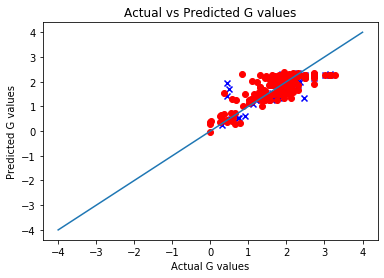

In [35]:
x = np.linspace(-4,4,10)

plt.scatter(results['Actual'], results['Predicted'], color = 'b', marker = 'x')
plt.scatter(train_results['Actual'], train_results['Predicted'], color = 'r', marker = 'o')
#plt.xlim(0, 4)
#plt.ylim(-1, 3)
plt.plot(x, x)
plt.title('Actual vs Predicted G values')
plt.xlabel('Actual G values')
plt.ylabel('Predicted G values')
plt.rcParams['figure.figsize'] = [10,10]
plt.show()

In [36]:
tree_model = DecisionTreeRegressor()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = random_state)

tree_model.fit(X_train.reset_index().drop(['Reaction'], axis = 1), Y_train.reset_index().drop('Reaction', axis = 1))
Y_pred = tree_model.predict(X_test.reset_index().drop(['Reaction'], axis = 1))

results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
results.set_index('Reaction', inplace = True)
results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_test, Y_pred)))
print('test r^2: ' + str(r2_score(Y_test, Y_pred)))
results.head()

Y_train_pred = tree_model.predict(X_train.reset_index().drop(['Reaction'], axis = 1))
train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
train_results.set_index('Reaction', inplace = True)
train_results.columns = ['Actual', 'Predicted']

all_results = pd.concat([train_results, results])
all_results
print('Total r^2 score: ' + str(r2_score(all_results['Actual'], all_results['Predicted'])))

MSE: 0.2606312309830895
test r^2: 0.5002112987457702
Total r^2 score: 0.735142781838559


In [37]:
tree_model.feature_importances_
features = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(tree_model.feature_importances_)], axis = 1)
features.columns = ['Feature', 'Importance']
features.set_index('Feature', inplace = True)
features.sort_values(by = ['Importance'], ascending = False, inplace = True)

for feature in features.index:
    if feature in solvent_columns:
        features.loc[feature, 'type'] = 'solvent'
    elif feature in nucleophile_columns:
        features.loc[feature, 'type'] = 'nucleophile'
    elif feature in catalyst_columns:
        features.loc[feature, 'type'] = 'catalyst'
    elif feature in iminium_columns:
        features.loc[feature, 'type'] = 'iminium'

features = features[['type', 'Importance']]

features.head(25)
#for i in range(299):
 #   if np.abs(features.iloc[i,0]) > 0.01:
  #      print(i, features.index[i])

,type,Importance
Feature,,
b,catalyst,0.506163
C3 R,catalyst,0.095226
nXH,nucleophile,0.091599
L,nucleophile,0.045230
L5 L,catalyst,0.040758
reciprocal distance square Randic-type index,solvent,0.040235
Eccentric,solvent,0.036898
LUMO (nucleophile),nucleophile,0.019851
B1,nucleophile,0.015459


In [38]:
#features.to_excel('features.xlsx', sheet_name = "Decision Tree")

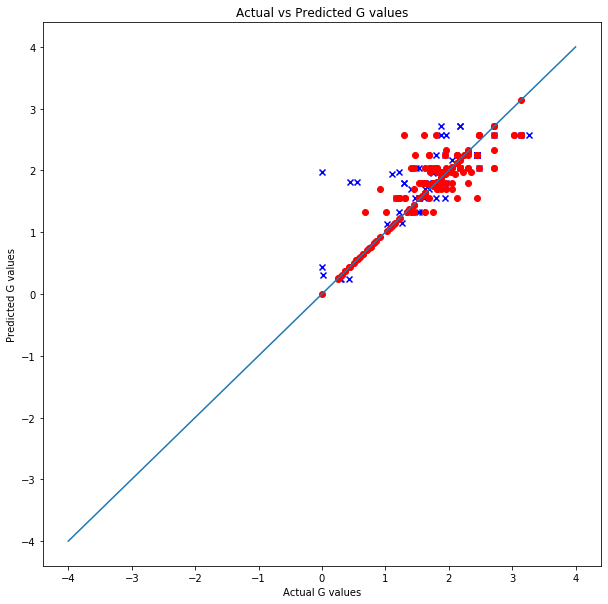

In [39]:
x = np.linspace(-4,4,10)

plt.scatter(results['Actual'], results['Predicted'], color = 'b', marker = 'x')
plt.scatter(train_results['Actual'], train_results['Predicted'], color = 'r', marker = 'o')
#plt.xlim(0, 4)
#plt.ylim(-1, 3)
plt.plot(x, x)
plt.title('Actual vs Predicted G values')
plt.xlabel('Actual G values')
plt.ylabel('Predicted G values')
plt.rcParams['figure.figsize'] = [10,10]
plt.show()

In [40]:
boosting_tree = GradientBoostingRegressor()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = random_state)

boosting_tree.fit(X_train.reset_index().drop(['Reaction'], axis = 1), Y_train.reset_index().drop('Reaction', axis = 1).values.ravel())
Y_pred = boosting_tree.predict(X_test.reset_index().drop(['Reaction'], axis = 1))

results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
results.set_index('Reaction', inplace = True)
results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_test, Y_pred)))
print('test r^2: ' + str(r2_score(Y_test, Y_pred)))
results.head()

Y_train_pred = boosting_tree.predict(X_train.reset_index().drop(['Reaction'], axis = 1))
train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
train_results.set_index('Reaction', inplace = True)
train_results.columns = ['Actual', 'Predicted']
train_results

all_results = pd.concat([train_results, results])
all_results
print('Total r^2 score: ' + str(r2_score(all_results['Actual'], all_results['Predicted'])))

MSE: 0.25464382802225655
test r^2: 0.2028556403389956
Total r^2 score: 0.7422592242423889


In [41]:
boosting_tree.feature_importances_
features = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(boosting_tree.feature_importances_)], axis = 1)
features.columns = ['Feature', 'Importance']
features.set_index('Feature', inplace = True)
features.sort_values(by = ['Importance'], ascending = False, inplace = True)

for feature in features.index:
    if feature in solvent_columns:
        features.loc[feature, 'type'] = 'solvent'
    elif feature in nucleophile_columns:
        features.loc[feature, 'type'] = 'nucleophile'
    elif feature in catalyst_columns:
        features.loc[feature, 'type'] = 'catalyst'
    elif feature in iminium_columns:
        features.loc[feature, 'type'] = 'iminium'

features = features[['type', 'Importance']]

features.head(25)
#for i in range(299):
 #   if features.iloc[i,0] > 0.01:
  #      print(i, features.index[i])

,type,Importance
Feature,,
arhs,catalyst,0.201007
B52 L,catalyst,0.091784
nPOsy,catalyst,0.051886
L2 A,catalyst,0.049535
LUMO (nucleophile),nucleophile,0.036903
X,nucleophile,0.031673
Polarizability (solvent),solvent,0.030808
B15 A,catalyst,0.029437
B52 R,catalyst,0.027194


In [42]:
#features.to_excel('features.xlsx', sheet_name = "Boosting Tree")

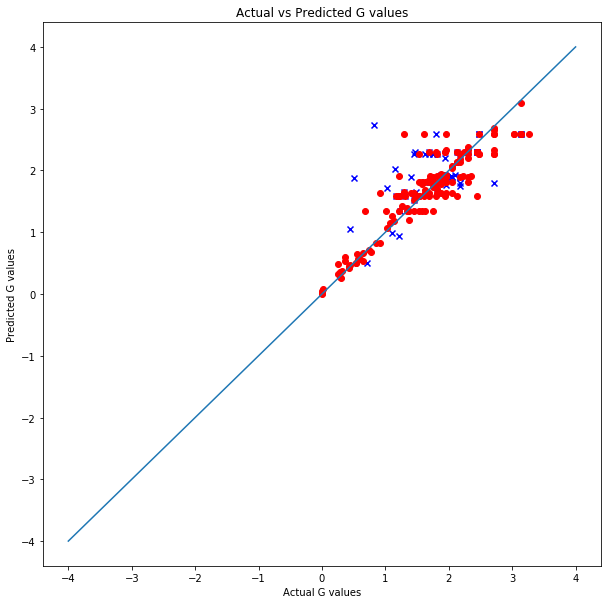

In [43]:
x = np.linspace(-4,4,10)

plt.scatter(results['Actual'], results['Predicted'], color = 'b', marker = 'x')
plt.scatter(train_results['Actual'], train_results['Predicted'], color = 'r', marker = 'o')
#plt.xlim(0, 4)
#plt.ylim(-1, 3)
plt.plot(x, x)
plt.title('Actual vs Predicted G values')
plt.xlabel('Actual G values')
plt.ylabel('Predicted G values')
plt.rcParams['figure.figsize'] = [10,10]
plt.show()

In [41]:
forest = RandomForestRegressor()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = random_state)

forest.fit(X_train.reset_index().drop(['Reaction'], axis = 1), Y_train.reset_index().drop('Reaction', axis = 1).values.ravel())
Y_pred = forest.predict(X_test.reset_index().drop(['Reaction'], axis = 1))

results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
results.set_index('Reaction', inplace = True)
results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_test, Y_pred)))
print('r^2: ' + str(r2_score(Y_test, Y_pred)))
results.head()

Y_train_pred = forest.predict(X_train.reset_index().drop(['Reaction'], axis = 1))
train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
train_results.set_index('Reaction', inplace = True)
train_results.columns = ['Actual', 'Predicted']
train_results

all_results = pd.concat([train_results, results])
all_results
print('Total r^2 score: ' + str(r2_score(all_results['Actual'], all_results['Predicted'])))

MSE: 0.20475717416276001
r^2: 0.6669475478995115
Total r^2 score: 0.8451308888468232


In [45]:
forest.feature_importances_
features = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(forest.feature_importances_)], axis = 1)
features.columns = ['Feature', 'Importance']
features.set_index('Feature', inplace = True)
features.sort_values(by = ['Importance'], ascending = False, inplace = True)

for feature in features.index:
    if feature in solvent_columns:
        features.loc[feature, 'type'] = 'solvent'
    elif feature in nucleophile_columns:
        features.loc[feature, 'type'] = 'nucleophile'
    elif feature in catalyst_columns:
        features.loc[feature, 'type'] = 'catalyst'
    elif feature in iminium_columns:
        features.loc[feature, 'type'] = 'iminium'

features = features[['type', 'Importance']]

features.head(25)
#features.index[0:20]

,type,Importance
Feature,,
iXH,nucleophile,0.051161
nXH,nucleophile,0.045060
B12 L,catalyst,0.042210
B12 R,catalyst,0.038276
B52 A,catalyst,0.034948
X,nucleophile,0.030957
L2 L,catalyst,0.030719
B12 A,catalyst,0.027910
b,catalyst,0.024734


In [46]:
#features.to_excel('features.xlsx', sheet_name = "Random Forest")

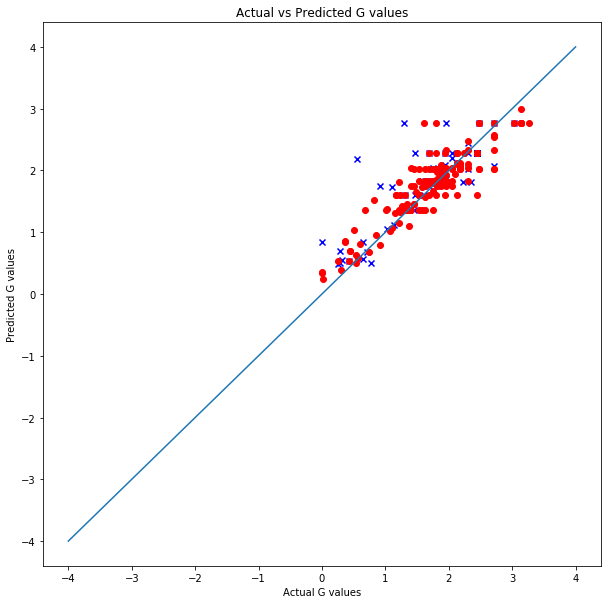

In [47]:
x = np.linspace(-4,4,10)

plt.scatter(results['Actual'], results['Predicted'], color = 'b', marker = 'x')
plt.scatter(train_results['Actual'], train_results['Predicted'], color = 'r', marker = 'o')
#plt.xlim(0, 4)
#plt.ylim(-1, 3)
plt.plot(x, x)
plt.title('Actual vs Predicted G values')
plt.xlabel('Actual G values')
plt.ylabel('Predicted G values')
plt.rcParams['figure.figsize'] = [10,10]
plt.show()

###############################################################################################################################

Run model 10 times

###############################################################################################################################

In [48]:
def run_lasso(iterations):
    scores = pd.DataFrame(columns = ['iteration', 'MSE', 'r^2', 'total r^2'])
    for i in range(iterations):
        #develop model
        lasso_model = Lasso(alpha = 0.05)
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = random_state)

        lasso_model.fit(X_train.reset_index().drop(['Reaction'], axis = 1), Y_train.reset_index().drop('Reaction', axis = 1))
        
        #evaluating performance & scores
        Y_pred = lasso_model.predict(X_test.reset_index().drop(['Reaction'], axis = 1))

        results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
        results.set_index('Reaction', inplace = True)
        results.columns = ['Actual', 'Predicted']

        Y_train_pred = lasso_model.predict(X_train.reset_index().drop(['Reaction'], axis = 1))
        train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
        train_results.set_index('Reaction', inplace = True)
        train_results.columns = ['Actual', 'Predicted']

        all_results = pd.concat([train_results, results])

        scores = scores.append({'iteration': str(i+1),
                    'MSE': mean_squared_error(Y_test, Y_pred),
                    'r^2': r2_score(Y_test, Y_pred),
                    'total r^2': r2_score(all_results['Actual'], all_results['Predicted'])}, ignore_index = True)
        
        #evaluating most important features
        features = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(lasso_model.coef_), pd.DataFrame(np.abs(lasso_model.coef_))], axis = 1)
        features.columns = ['Feature', 'Coefficient', 'Abs Val Coefficient']
        features.set_index('Feature', inplace = True)

        features.sort_values(by = ['Abs Val Coefficient'], ascending = False, inplace = True)

        if i == 0:
            total_features = features.sort_values(by = ['Abs Val Coefficient'], ascending = False)
        else:
            for feature in total_features.index:
                total_features.loc[feature, 'Abs Val Coefficient'] += features.loc[feature, 'Abs Val Coefficient']
        
    
    #add average for scores
    averages = pd.DataFrame(scores.mean(axis = 0)).T
    scores = scores.append({'iteration': 'average',
                           'MSE': averages.iloc[0,1],
                           'r^2': averages.iloc[0,2],
                           'total r^2': averages.iloc[0,3]}, ignore_index = True)
    scores.set_index('iteration')
    
    #which stage each important feature is in
    for feature in total_features.index:
        if feature in solvent_columns:
            total_features.loc[feature, 'type'] = 'solvent'
        elif feature in nucleophile_columns:
            total_features.loc[feature, 'type'] = 'nucleophile'
        elif feature in catalyst_columns:
            total_features.loc[feature, 'type'] = 'catalyst'
        elif feature in iminium_columns:
            total_features.loc[feature, 'type'] = 'iminium'

    total_features = total_features[['type', 'Coefficient', 'Abs Val Coefficient']]
    total_features = total_features.sort_values(by = ['Abs Val Coefficient'], ascending = False)
    
    return scores, total_features

In [49]:
def run_decision_tree(iterations):
    scores = pd.DataFrame(columns = ['iteration', 'MSE', 'r^2', 'total r^2'])
    #scores.set_index('iteration', inplace = True)
    for i in range(iterations):
        #develop model
        tree_model = DecisionTreeRegressor()
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = random_state)

        tree_model.fit(X_train.reset_index().drop(['Reaction'], axis = 1), Y_train.reset_index().drop('Reaction', axis = 1))
        
        #evaluating performance
        Y_pred = tree_model.predict(X_test.reset_index().drop(['Reaction'], axis = 1))

        results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
        results.set_index('Reaction', inplace = True)
        results.columns = ['Actual', 'Predicted']

        Y_train_pred = tree_model.predict(X_train.reset_index().drop(['Reaction'], axis = 1))
        train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
        train_results.set_index('Reaction', inplace = True)
        train_results.columns = ['Actual', 'Predicted']

        all_results = pd.concat([train_results, results])

        scores = scores.append({'iteration': str(i+1),
                    'MSE': mean_squared_error(Y_test, Y_pred),
                    'r^2': r2_score(Y_test, Y_pred),
                    'total r^2': r2_score(all_results['Actual'], all_results['Predicted'])}, ignore_index = True)
        
        #evaluating most important features
        features = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(tree_model.feature_importances_)], axis = 1)
        features.columns = ['Feature', 'Importance']
        features.set_index('Feature', inplace = True)

        if i == 0:
            total_features = features.sort_values(by = ['Importance'], ascending = False)
        else:
            for feature in total_features.index:
                total_features.loc[feature, 'Importance'] += features.loc[feature, 'Importance']
    
    #add average for each row
    averages = pd.DataFrame(scores.mean(axis = 0)).T
    scores = scores.append({'iteration': 'average',
                           'MSE': averages.iloc[0,1],
                           'r^2': averages.iloc[0,2],
                           'total r^2': averages.iloc[0,3]}, ignore_index = True)
    scores.set_index('iteration')
    
    #which stage each important feature is in
    for feature in total_features.index:
        if feature in solvent_columns:
            total_features.loc[feature, 'type'] = 'solvent'
        elif feature in nucleophile_columns:
            total_features.loc[feature, 'type'] = 'nucleophile'
        elif feature in catalyst_columns:
            total_features.loc[feature, 'type'] = 'catalyst'
        elif feature in iminium_columns:
            total_features.loc[feature, 'type'] = 'iminium'

    total_features = total_features[['type', 'Importance']]
    total_features = total_features.sort_values(by = ['Importance'], ascending = False)
    
    return scores, total_features

In [50]:
def run_boosting_tree(iterations):
    scores = pd.DataFrame(columns = ['iteration', 'MSE', 'r^2', 'total r^2'])
    #scores.set_index('iteration', inplace = True)
    for i in range(iterations):
        #develop model
        boosting_tree = GradientBoostingRegressor()
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = random_state)

        boosting_tree.fit(X_train.reset_index().drop(['Reaction'], axis = 1), Y_train.reset_index().drop('Reaction', axis = 1).values.ravel())
        
        #evaluating performance
        Y_pred = boosting_tree.predict(X_test.reset_index().drop(['Reaction'], axis = 1))

        results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
        results.set_index('Reaction', inplace = True)
        results.columns = ['Actual', 'Predicted']

        Y_train_pred = boosting_tree.predict(X_train.reset_index().drop(['Reaction'], axis = 1))
        train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
        train_results.set_index('Reaction', inplace = True)
        train_results.columns = ['Actual', 'Predicted']
        
        all_results = pd.concat([train_results, results])
       
        scores = scores.append({'iteration': str(i+1),
                    'MSE': mean_squared_error(Y_test, Y_pred),
                    'r^2': r2_score(Y_test, Y_pred),
                    'total r^2': r2_score(all_results['Actual'], all_results['Predicted'])}, ignore_index = True)
        
        #evaluating most important features
        features = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(boosting_tree.feature_importances_)], axis = 1)
        features.columns = ['Feature', 'Importance']
        features.set_index('Feature', inplace = True)
        
        if i == 0:
            total_features = features.sort_values(by = ['Importance'], ascending = False)
        else:
            for feature in total_features.index:
                total_features.loc[feature, 'Importance'] += features.loc[feature, 'Importance']
        
        
    #add average for each row
    averages = pd.DataFrame(scores.mean(axis = 0)).T
    scores = scores.append({'iteration': 'average',
                           'MSE': averages.iloc[0,1],
                           'r^2': averages.iloc[0,2],
                           'total r^2': averages.iloc[0,3]}, ignore_index = True)
    scores.set_index('iteration')
    
    #which stage each important feature is in
    for feature in total_features.index:
        if feature in solvent_columns:
            total_features.loc[feature, 'type'] = 'solvent'
        elif feature in nucleophile_columns:
            total_features.loc[feature, 'type'] = 'nucleophile'
        elif feature in catalyst_columns:
            total_features.loc[feature, 'type'] = 'catalyst'
        elif feature in iminium_columns:
            total_features.loc[feature, 'type'] = 'iminium'

    total_features = total_features[['type', 'Importance']]
    total_features = total_features.sort_values(by = ['Importance'], ascending = False)
    
    return scores, total_features

In [51]:
def run_random_forest(iterations):
    scores = pd.DataFrame(columns = ['iteration', 'MSE', 'r^2', 'total r^2'])
    #scores.set_index('iteration', inplace = True)
    for i in range(iterations):
        #develop model & scores
        forest = RandomForestRegressor()
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = random_state)

        forest.fit(X_train.reset_index().drop(['Reaction'], axis = 1), Y_train.reset_index().drop('Reaction', axis = 1).values.ravel())
        
        #evaluating performance
        Y_pred = forest.predict(X_test.reset_index().drop(['Reaction'], axis = 1))

        results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
        results.set_index('Reaction', inplace = True)
        results.columns = ['Actual', 'Predicted']

        Y_train_pred = forest.predict(X_train.reset_index().drop(['Reaction'], axis = 1))
        train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
        train_results.set_index('Reaction', inplace = True)
        train_results.columns = ['Actual', 'Predicted']

        all_results = pd.concat([train_results, results])
        
        scores = scores.append({'iteration': str(i+1),
                    'MSE': mean_squared_error(Y_test, Y_pred),
                    'r^2': r2_score(Y_test, Y_pred),
                    'total r^2': r2_score(all_results['Actual'], all_results['Predicted'])}, ignore_index = True)
        
        #evaluating most important features
        features = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(forest.feature_importances_)], axis = 1)
        features.columns = ['Feature', 'Importance']
        features.set_index('Feature', inplace = True)
        
        if i == 0:
            total_features = features.sort_values(by = ['Importance'], ascending = False)
        else:
            for feature in total_features.index:
                total_features.loc[feature, 'Importance'] += features.loc[feature, 'Importance']
    
    #add average for each row
    averages = pd.DataFrame(scores.mean(axis = 0)).T
    scores = scores.append({'iteration': 'average',
                           'MSE': averages.iloc[0,1],
                           'r^2': averages.iloc[0,2],
                           'total r^2': averages.iloc[0,3]}, ignore_index = True)
    scores.set_index('iteration')
    
    #which stage each important feature is in
    for feature in total_features.index:
        if feature in solvent_columns:
            total_features.loc[feature, 'type'] = 'solvent'
        elif feature in nucleophile_columns:
            total_features.loc[feature, 'type'] = 'nucleophile'
        elif feature in catalyst_columns:
            total_features.loc[feature, 'type'] = 'catalyst'
        elif feature in iminium_columns:
            total_features.loc[feature, 'type'] = 'iminium'

    total_features = total_features[['type', 'Importance']]
    total_features = total_features.sort_values(by = ['Importance'], ascending = False)
    
    return scores, total_features

In [ ]:
results, features = run_lasso(100)
#features.to_excel('features.xlsx', sheet_name = 'lasso')
print(results)

In [ ]:
results, features = run_decision_tree(100)
#features.to_excel('features.xlsx', sheet_name = 'decision tree')
print(results)

In [ ]:
results, features = run_boosting_tree(100)
#features.to_excel('features.xlsx', sheet_name = 'boosting tree')
print(results)

In [ ]:
results, features = run_random_forest(100)
#features.to_excel('features.xlsx', sheet_name = 'random forest')
print(results)

###############################################################################################################################

Standardized

###############################################################################################################################

In [56]:
def run_random_forest_standard(iterations):
    scores = pd.DataFrame(columns = ['iteration', 'MSE', 'r^2', 'total r^2'])
    #scores.set_index('iteration', inplace = True)
    for i in range(iterations):
        #develop model & scores
        forest = RandomForestRegressor()
        X_train, X_test, Y_train, Y_test = train_test_split(X_Z_scaled, Y_Z, test_size = test_size, random_state = random_state)

        forest.fit(X_train, Y_train.reset_index().drop('Reaction', axis = 1).values.ravel())
        
        #evaluating performance
        Y_pred = forest.predict(X_test)

        results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
        results.set_index('Reaction', inplace = True)
        results.columns = ['Actual', 'Predicted']

        Y_train_pred = forest.predict(X_train)
        train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
        train_results.set_index('Reaction', inplace = True)
        train_results.columns = ['Actual', 'Predicted']

        all_results = pd.concat([train_results, results])
        
        scores = scores.append({'iteration': str(i+1),
                    'MSE': mean_squared_error(Y_test, Y_pred),
                    'r^2': r2_score(Y_test, Y_pred),
                    'total r^2': r2_score(all_results['Actual'], all_results['Predicted'])}, ignore_index = True)
    
    #add average for each row
    averages = pd.DataFrame(scores.mean(axis = 0)).T
    scores = scores.append({'iteration': 'average',
                           'MSE': averages.iloc[0,1],
                           'r^2': averages.iloc[0,2],
                           'total r^2': averages.iloc[0,3]}, ignore_index = True)
    scores.set_index('iteration')
    
    return scores

In [57]:
run_random_forest_standard(100)

,iteration,MSE,r^2,total r^2
0,1,0.173547,0.824994,0.923836
1,2,0.165108,0.758072,0.927230
2,3,0.188338,0.694376,0.921806
3,4,0.209356,0.670031,0.914088
4,5,0.136969,0.746863,0.935857
...,...,...,...,...
96,97,0.105810,0.872818,0.943239
97,98,0.238913,0.667550,0.909202
98,99,0.167217,0.749994,0.926710
99,100,0.189206,0.762800,0.923258


In [ ]:
7/3
#look through code and try to fix bugs, make sure information are used correctly
#run models 10 times with computer initialized random seed
#try to predict reactions by withholding others 
#prepare powerpoint for chemistry collaborator mainly focused on results, importance of features (one with iminium, one without iminium),
#dont use complex terms